In [1]:
import pandas as pd
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
import numpy as np
import datetime as dt
import warnings
from pandasql import sqldf

pysql  = lambda x: sqldf(x, globals())
warnings.filterwarnings("ignore")
% matplotlib inline
plotly.tools.set_credentials_file(username='dorismue03', api_key='PKgs6IsONoDHK94JDAla')

In [2]:
user_activity = pd.read_csv("/Users/faye/Desktop/Anchor Free/user_activity.csv")
for i in range(len(user_activity)):
    if len(str(dt.datetime.strptime( user_activity["date"][i], "%d-%b").month)) == 1:
        month = "0%s"% (dt.datetime.strptime( user_activity["date"][i], "%d-%b").month)
    else:
        month = str(dt.datetime.strptime( user_activity["date"][i], "%d-%b").month)
        
    if len(str(dt.datetime.strptime( user_activity["date"][i], "%d-%b").day)) == 1:
        day = "0%s" % (dt.datetime.strptime( user_activity["date"][i], "%d-%b").day)
    else:
        day = str(dt.datetime.strptime( user_activity["date"][i], "%d-%b").day)
        
    user_activity["date"][i] = "2017"+"-"+month+"-"+day
    
user_activity

,date,number_of_connected_users,number_of_connections
0,2017-05-01,12842,17979
1,2017-05-02,11943,16720
2,2017-05-03,12643,17700
3,2017-05-04,11989,16785
4,2017-05-05,13047,18266
5,2017-05-06,12148,17007
6,2017-05-07,12848,17987
7,2017-05-08,12194,17072
8,2017-05-09,11920,16688
9,2017-05-10,12820,17948


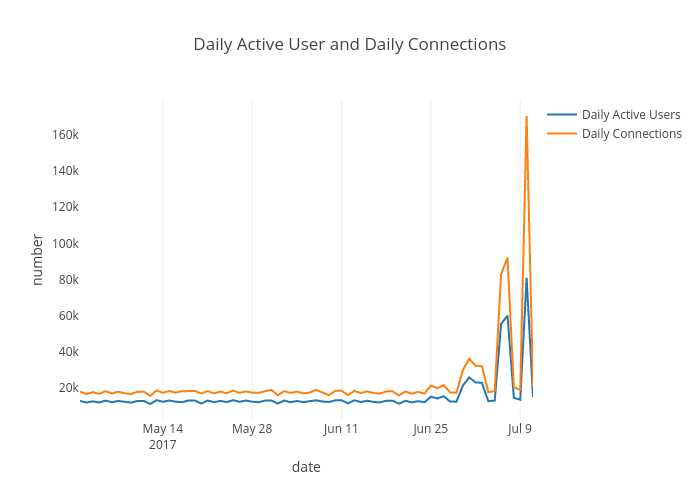

In [3]:
x = user_activity["date"].tolist()
y1 = user_activity["number_of_connected_users"].tolist()
y2 = user_activity["number_of_connections"].tolist()

trace1 = go.Scatter(x = x,
                    y = y1,
                    mode = "lines", 
                    name = "Daily Active Users"
                   )

trace2 = go.Scatter(x = x,
                    y = y2,
                    mode = "lines", 
                    name = "Daily Connections"
                   )

data = [trace1, trace2]
layout = go.Layout(title = "Daily Active User and Daily Connections",
                   xaxis = dict(
                       title = "date"
                   ),
                   yaxis = dict(
                       title = "number",
                       showgrid = False
                   ),
                   showlegend = True
                  )

fig = go.Figure(data = data, layout = layout)

py.iplot(fig)
py.image.ishow(fig)

In [5]:
activity_snippet = pysql(
    '''select * from user_activity where date > '2017-06-20'
    '''
)

activity_snippet["average_connection_per_user"] = activity_snippet["number_of_connections"]*1.0/activity_snippet["number_of_connected_users"]
activity_snippet

,date,number_of_connected_users,number_of_connections,average_connection_per_user
0,2017-06-21,12952,18133,1.400015
1,2017-06-22,12053,16874,1.399983
2,2017-06-23,12753,17854,1.399984
3,2017-06-24,12099,16939,1.400033
4,2017-06-25,15246,21344,1.399974
5,2017-06-26,14241,19937,1.399972
6,2017-06-27,15444,21622,1.400026
7,2017-06-28,12564,17590,1.400032
8,2017-06-29,12432,17405,1.400016
9,2017-06-30,21324,29854,1.400019


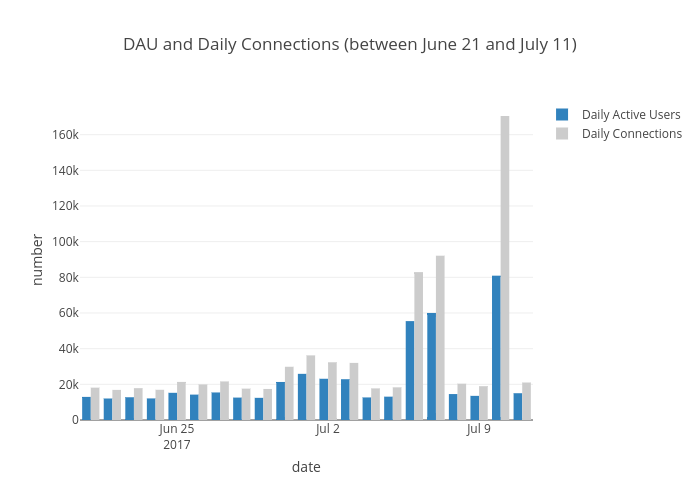

In [6]:
x = activity_snippet["date"]
y1 = activity_snippet["number_of_connected_users"]
y2 = activity_snippet["number_of_connections"]



trace1 = go.Bar(x = x,
                y = y1,
                name = "Daily Active Users",
                marker = dict(
                    color = "rgb(49,130,189)"
                )
               )

trace2 = go.Bar(x = x,
                y = y2,
                name = "Daily Connections",
                marker = dict(
                    color = "rgb(204,204,204)"
                )
               )


layout = go.Layout(title = "DAU and Daily Connections (between June 21 and July 11)",
                   xaxis = dict(
                       title = "date"
                   ),
                   yaxis = dict(
                       title = "number",
                       showgrid = True
                   ),
                   showlegend = True,
                   barmode = "group"

                  )

fig = go.Figure(data = [trace1, trace2], layout = layout)
py.iplot(fig)
py.image.ishow(fig)

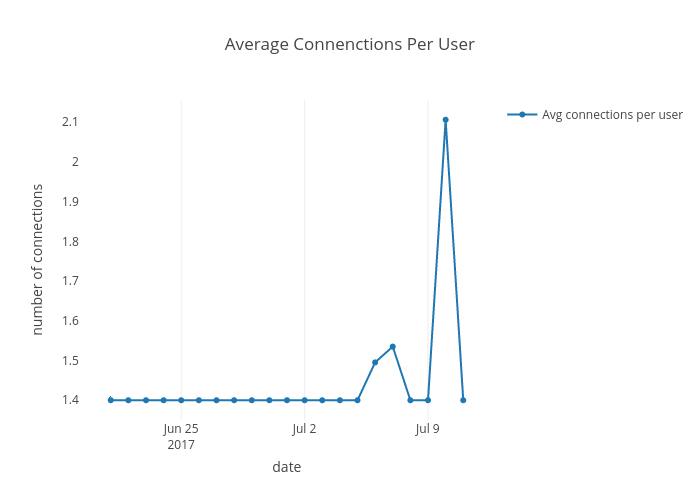

In [7]:
y3 = activity_snippet["average_connection_per_user"]

trace3 = go.Scatter(x = x,
                    y = y3,
                    name = "Avg connections per user",
                    mode = "lines+markers"
                   )

layout = go.Layout(title = "Average Connenctions Per User",
                   xaxis = dict(
                       title = "date"
                   ), 
                   yaxis = dict(
                       title = "number of connections",
                       showgrid = False
                   ),
                   showlegend=True
                  )
fig = go.Figure(data = [trace3], layout = layout)

py.iplot(fig)
py.image.ishow(fig)